<a href="https://colab.research.google.com/github/1980zemira/Debunking-Market-Myth/blob/main/Capstone_code_working_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nsepy

In [ ]:
pip install PyPortfolioOpt

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime as dt
import yfinance as yf
from statistics import mean
import nsepy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Select 5 tickers from the S&P 500
tickers = ["SHP.JO", "AMS.JO", "BTI.JO", "MTN.JO", "GFI.JO", "SBK.JO","VOD.JO", "CPI.JO",  "GLN.JO", "FSR.JO"]

# Download the historical data of the selected tickers
data = yf.download(tickers, start="2014-01-01", end="2024-01-01")

[*********************100%%**********************]  10 of 10 completed


In [ ]:
data.head()

Price          Adj Close                                           \
Ticker            AMS.JO        BTI.JO        CPI.JO       FSR.JO   
Date                                                                
2014-01-01  30240.316406  36742.593750  17502.318359  2270.124512   
2014-01-02  30478.300781  36895.449219  17605.683594  2258.739014   
2014-01-03  30631.074219  36674.382812  17398.953125  2245.456055   
2014-01-06  30225.732422  36828.531250  17093.060547  2189.793945   
2014-01-07  29759.742188  36574.683594  17563.664062  2213.830322   

Price                                                                          \
Ticker           GFI.JO       GLN.JO        MTN.JO       SBK.JO        SHP.JO   
Date                                                                            
2014-01-01  2702.427734  4867.694824  13458.970703  7598.201660  12663.958984   
2014-01-02  2834.715088  4803.751465  13466.415039  7650.454590  12779.786133   
2014-01-03  2856.899170  4750.465820  13349.198242  7545.950684  12626.119141   
2014-01-06  2796.917969  4763.786621  13113.538086  7415.028809  12508.748047   
2014-01-07  2748.440674  4769.115723  13300.830078  7565.325684  12488.670898   

Price                    ...  Volume                                    \
Ticker           VOD.JO  ...  AMS.JO  BTI.JO  CPI.JO   FSR.JO   GFI.JO   
Date                     ...                                             
2014-01-01  7517.843262  ...       0       0       0        0        0   
2014-01-02  7495.795410  ...  143618  295944   42700  3169228   724870   
2014-01-03  7461.317871  ...   91902  105046   46026  2590874  2008951   
2014-01-06  7432.488281  ...   85142  285228  110313  5587902  1321414   
2014-01-07  7517.843262  ...  137245  413162  239277  7105211  1701218   

Price                                                    
Ticker       GLN.JO   MTN.JO   SBK.JO   SHP.JO   VOD.JO  
Date                                                     
2014-01-01        0        0        0        0        0  
2014-01-02   159590  2799864  1460200  2140089   898749  
2014-01-03  1311595  2984532  1620880   578215   611932  
2014-01-06   249283  3239287  2297491  1002260  1581315  
2014-01-07  1536047  3227115  2695167  1193131   906604  

[5 rows x 60 columns]

In [ ]:
data.shape

(2538, 60)

In [ ]:
# Import the libraries

import pypfopt as pfo

# Calculate the daily returns of the tickers
returns = data["Adj Close"].pct_change().dropna()

# Equal-weighting method
# Assign the same weight to each ticker (1 / number of tickers)
equal_weights = np.array([1 / len(tickers)] * len(tickers))

# Calculate the portfolio return and risk (annualized) using the equal weights
equal_return = np.sum(returns.mean() * equal_weights) * 252
equal_risk = np.sqrt(np.dot(equal_weights.T, np.dot(returns.cov() * 252, equal_weights)))

# Print the results
print("Equal-weighting method:")
print("Weights:", equal_weights)
print("Return:", equal_return)
print("Risk:", equal_risk)

# Market capitalization-weighting method
# Get the market capitalization of each ticker as of the end date
market_caps = data["Adj Close"].iloc[-1] * data["Volume"].iloc[-1]

# Normalize the market capitalization to get the weights
market_weights = market_caps / market_caps.sum()

# Calculate the portfolio return and risk (annualized) using the market weights
market_return = np.sum(returns.mean() * market_weights) * 252
market_risk = np.sqrt(np.dot(market_weights.T, np.dot(returns.cov() * 252, market_weights)))

# Print the results
print("Market capitalization-weighting method:")
print("Weights:", market_weights)
print("Return:", market_return)
print("Risk:", market_risk)

# Optimization method
# Create an efficient frontier object using the PyPortfolioOpt library
ef = pfo.EfficientFrontier(returns.mean() * 252, returns.cov() * 252)

# Find the optimal weights that maximize the Sharpe ratio (return / risk)
optimal_weights = ef.max_sharpe()

# Clean the weights to remove very small values
optimal_weights = ef.clean_weights()

# Calculate the portfolio return and risk (annualized) using the optimal weights
optimal_return = ef.portfolio_performance()[0]
optimal_risk = ef.portfolio_performance()[1]

# Print the results
print("Optimization method:")
print("Weights:", optimal_weights)
print("Return:", optimal_return)
print("Risk:", optimal_risk)

Equal-weighting method:
Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Return: 0.17149820348060485
Risk: 0.19724096085200146
Market capitalization-weighting method:
Weights: Ticker
AMS.JO    0.039395
BTI.JO    0.035098
CPI.JO    0.074070
FSR.JO    0.159513
GFI.JO    0.407620
GLN.JO    0.024339
MTN.JO    0.094983
SBK.JO    0.084451
SHP.JO    0.067516
VOD.JO    0.013015
Name: 2023-12-29 00:00:00, dtype: float64
Return: 0.24527759642763966
Risk: 0.26375534980636284
Optimization method:
Weights: OrderedDict([('AMS.JO', 0.0), ('BTI.JO', 0.12322), ('CPI.JO', 0.46398), ('FSR.JO', 0.0), ('GFI.JO', 0.26142), ('GLN.JO', 0.06389), ('MTN.JO', 0.0), ('SBK.JO', 0.0), ('SHP.JO', 0.08749), ('VOD.JO', 0.0)])
Return: 0.2691424561293062
Risk: 0.23510716214058697


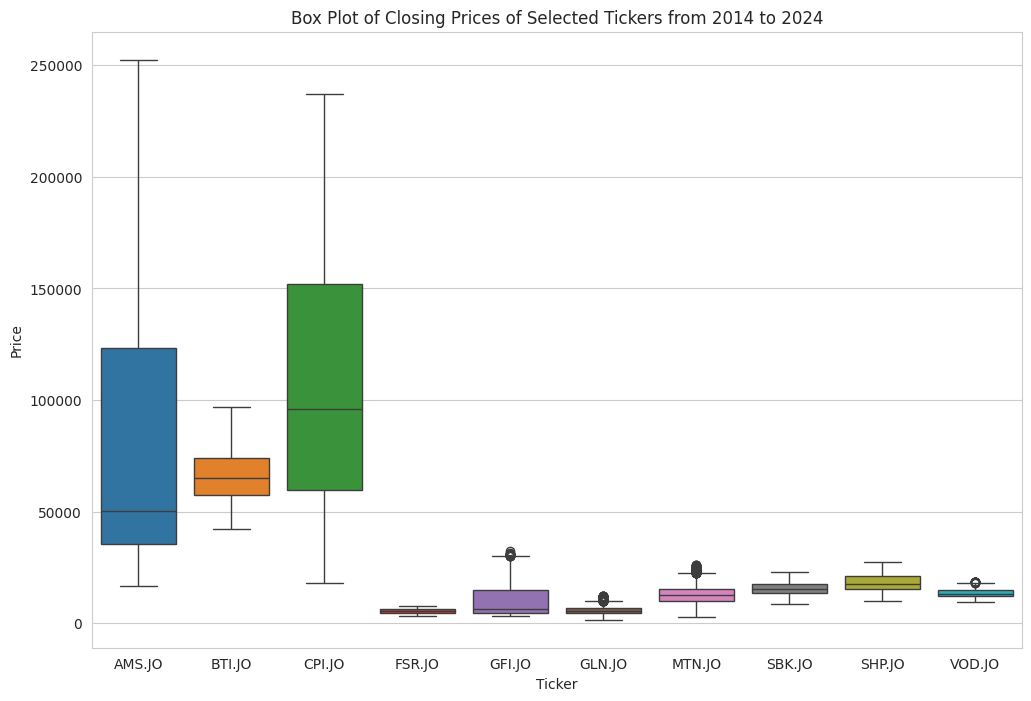

In [ ]:
# Set the figure size and style
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")

# Plot the box plot of the closing prices of the selected tickers
sns.boxplot(data=data['Close'])

# Add title and labels
plt.title("Box Plot of Closing Prices of Selected Tickers from 2014 to 2024")
plt.xlabel("Ticker")
plt.ylabel("Price")

# Show the plot
plt.show()

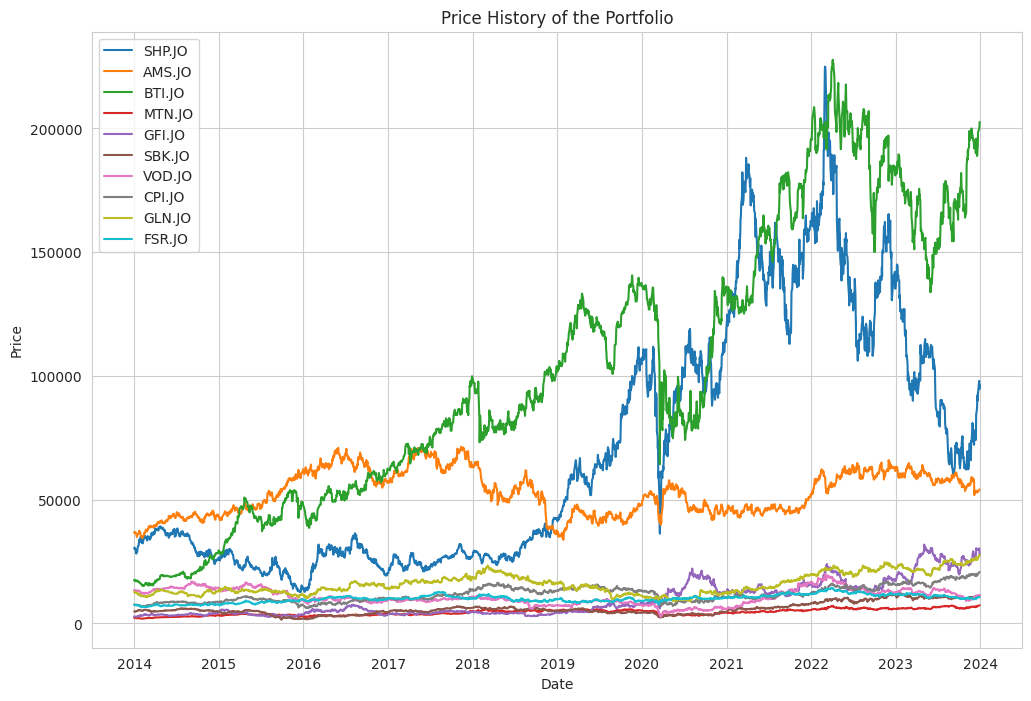

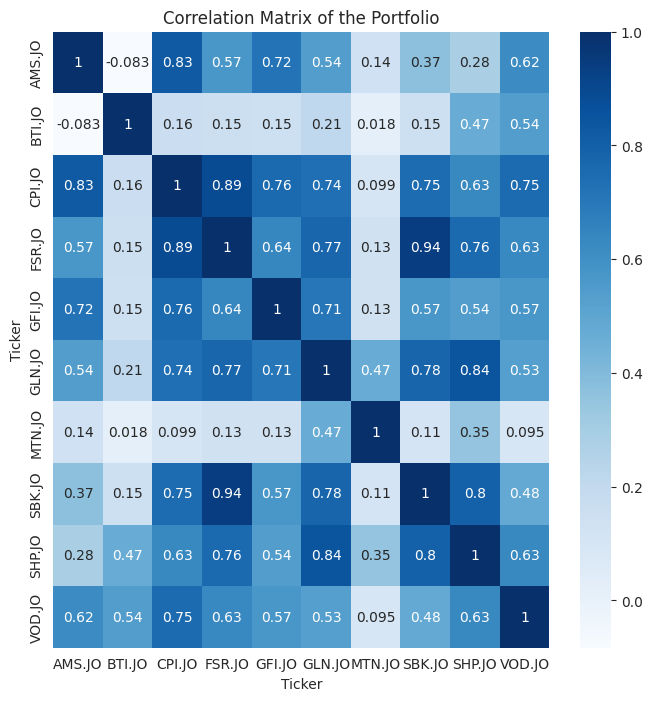

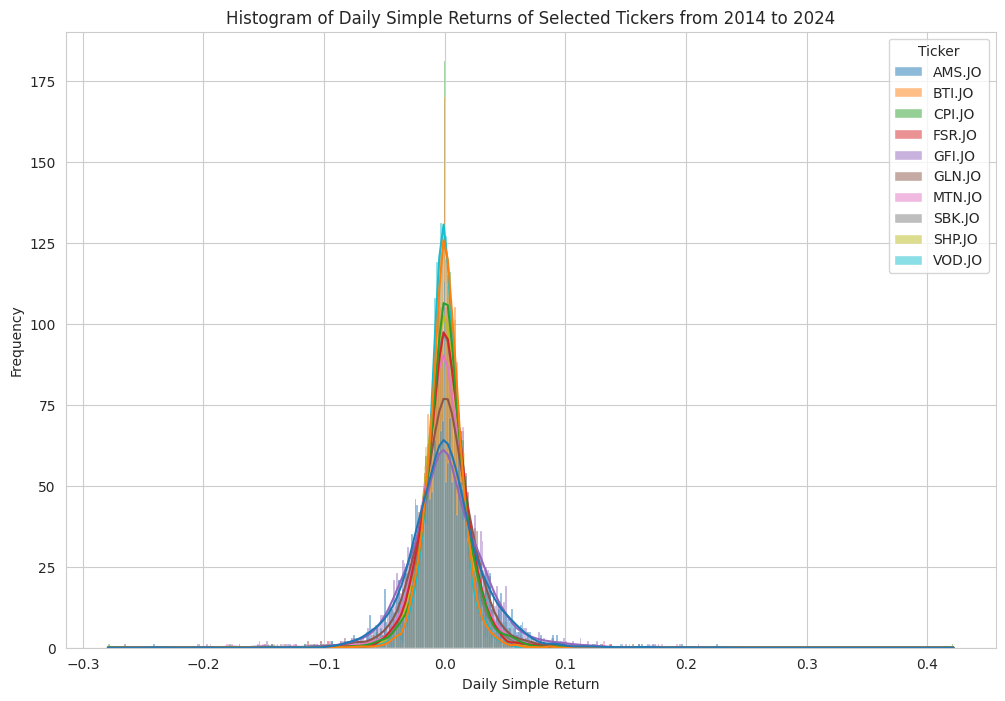

In [ ]:
#step 3: Plot the price history
plt.figure(figsize=(12, 8))
plt.title("Price History of the Portfolio")
plt.plot(data["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(tickers)
plt.show()

# Step 4: Plot the correlation matrix
corr_matrix = data["Adj Close"].corr()
plt.figure(figsize=(8, 8))
plt.title("Correlation Matrix of the Portfolio")
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()

# Set the figure size and style
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")

# Calculate the daily simple returns of the closing prices of the selected tickers
daily_returns = data['Close'].pct_change()

# Plot the histogram of the daily simple returns of the selected tickers
sns.histplot(data=daily_returns, kde=True)

# Add title and labels
plt.title("Histogram of Daily Simple Returns of Selected Tickers from 2014 to 2024")
plt.xlabel("Daily Simple Return")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [ ]:
# Define a function to calculate the trailing stop loss
def trailing_stop_loss(data, ticker, pct=0.1):
    # Calculate the daily returns
    returns = data["Adj Close",ticker].pct_change()

    # Initialize the peak price and the stop loss price
    peak = data["Adj Close",ticker][0]
    stop_loss = peak * (1 - pct)

    # Initialize the exit signal
    exit_signal = pd.Series(0, index=data.index)

    # Loop through the data and update the peak, stop loss, and exit signal
    for i in range(1, len(data)):
        price = data["Adj Close",ticker][i]
        if price > peak:
            peak = price
            stop_loss = peak * (1 - pct)
        elif price < stop_loss:
            exit_signal[i] = 1
            peak = price
            stop_loss = peak * (1 - pct)

    # Return the exit signal
    return exit_signal
# Apply the function to each ticker and store the results in a dictionary
exit_signals = {}
for ticker in tickers:
    exit_signals[ticker] = trailing_stop_loss(data, ticker)


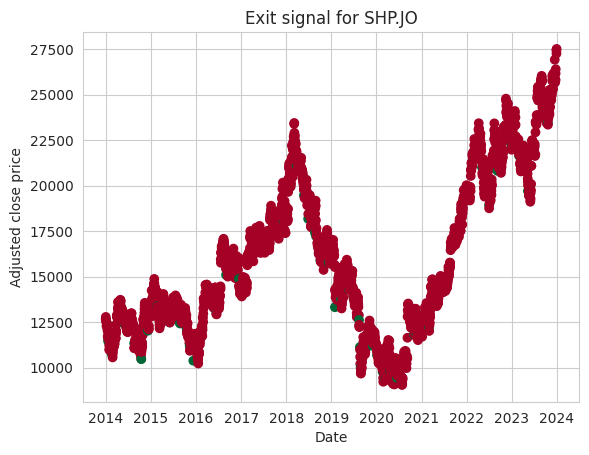

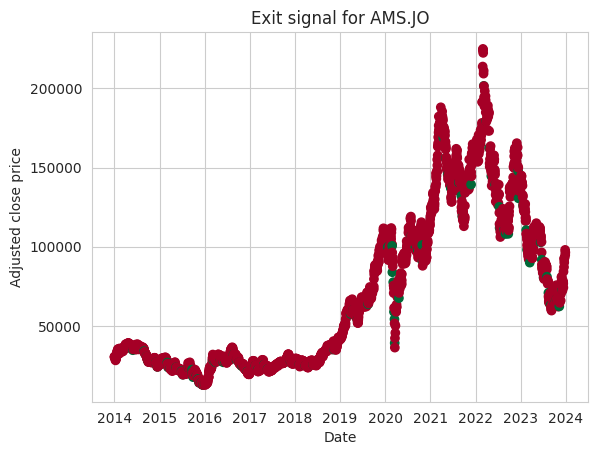

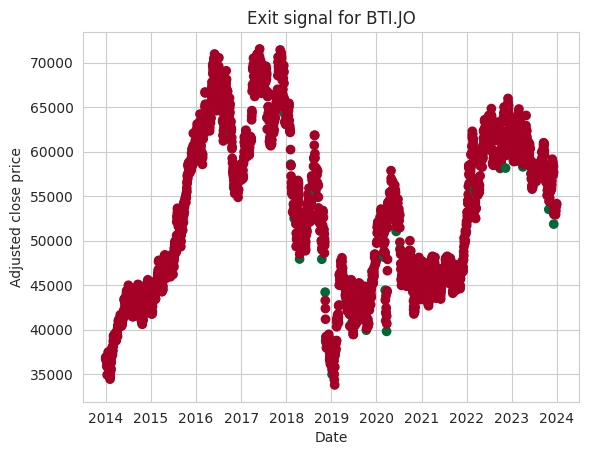

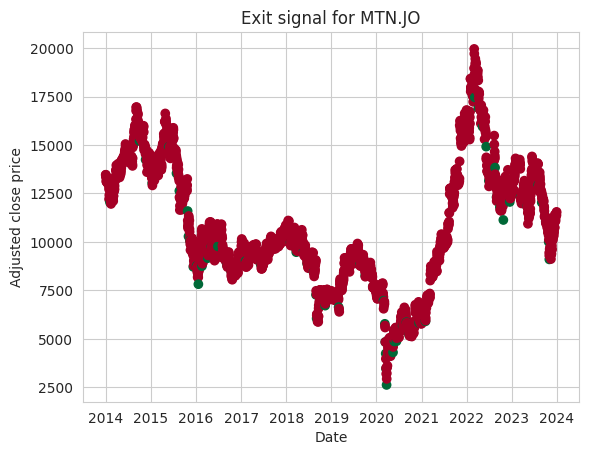

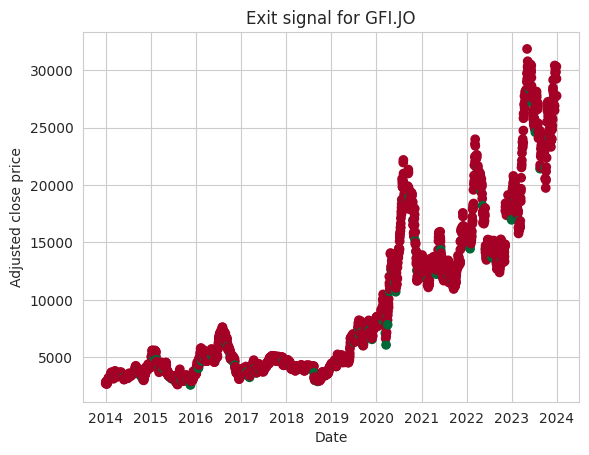

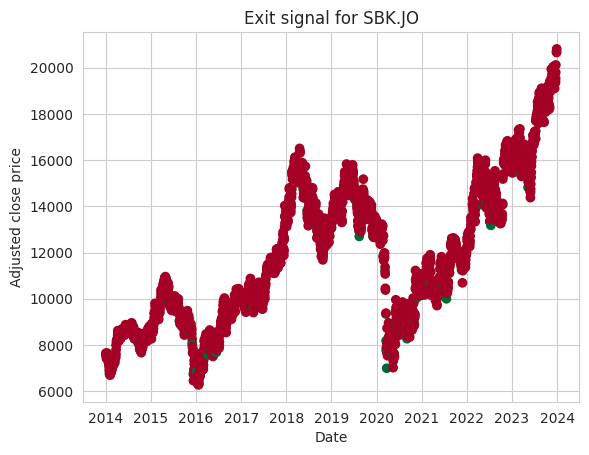

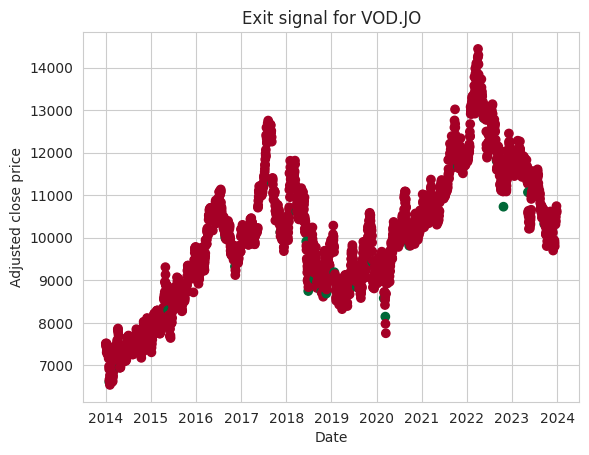

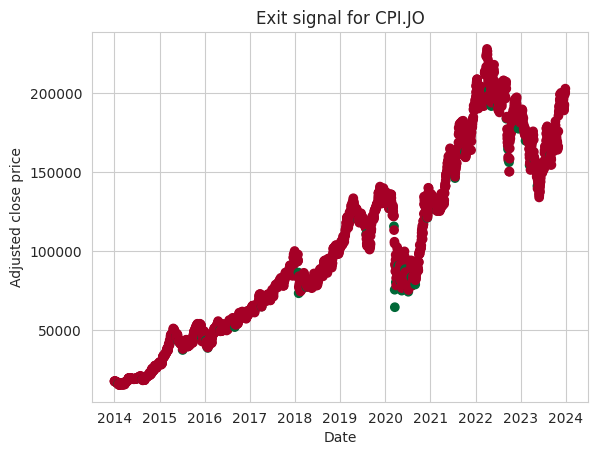

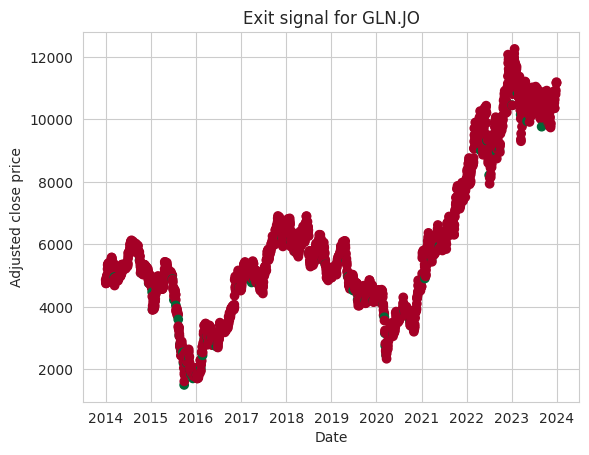

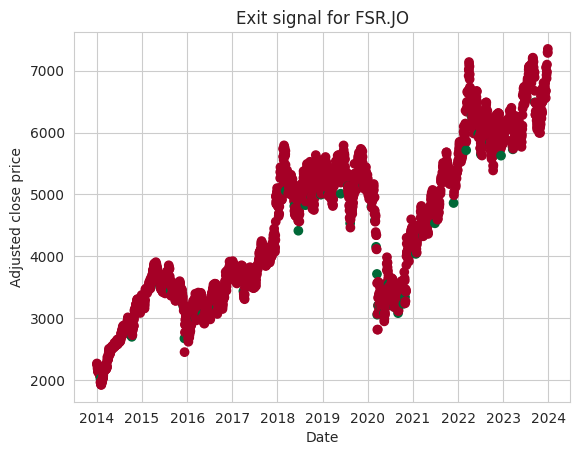

In [ ]:
import matplotlib.pyplot as plt
# Define a portfolio weight for each ticker
weights = [0.08749, 0.00, 0.12322, 0.00, 0.26142, 0.00, 0.00, 0.46389, 0.06389, 0.00]

# Define a trailing stop loss percentage
pct = 0.1

# Loop through the tickers
for ticker in tickers:
    # Calculate the exit signal for the ticker using the vectorized function
    exit_signal = trailing_stop_loss(data, ticker, pct)

    # Plot the exit signal as a scatter plot
    plt.scatter(data.index, data["Adj Close", ticker], c=exit_signal, cmap="RdYlGn")

    # Set the title, xlabel, and ylabel
    plt.title(f"Exit signal for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Adjusted close price")

    # Show the plot
    plt.show()

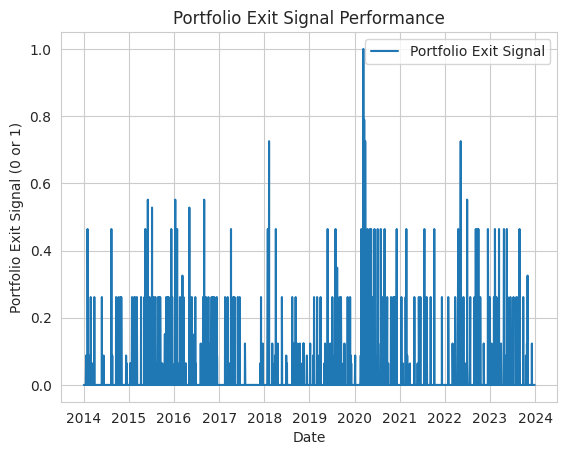

In [ ]:
# Define a portfolio weight for each ticker
weights = [0.08749, 0.00, 0.12322, 0.00, 0.26142, 0.00, 0.00, 0.46389, 0.06389, 0.00]

# Calculate the portfolio exit signal
portfolio_exit_signal = pd.DataFrame(exit_signals).mul(weights).sum(axis=1)

# Plot the portfolio exit signal
plt.plot(portfolio_exit_signal.index, portfolio_exit_signal, label="Portfolio Exit Signal")

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Portfolio Exit Signal (0 or 1)")
plt.title("Portfolio Exit Signal Performance")
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Define a function to calculate the moving average crossover
def moving_average_crossover(data, ticker, short=50, long=200):
    # Calculate the short-term and long-term moving averages
    data["SMA",ticker] = data["Adj Close",ticker].rolling(short).mean()
    data["LMA",ticker] = data["Adj Close",ticker].rolling(long).mean()

    # Initialize the entry signal
    entry_signal = pd.Series(0, index=data.index)

    # Loop through the data and update the entry signal
    for i in range(1, len(data)):
        # Buy signal: when the short-term moving average crosses above the long-term moving average
        if data["SMA",ticker][i] > data["LMA",ticker][i] and data["SMA",ticker][i-1] < data["LMA",ticker][i-1]:
            entry_signal[i] = 1
        # Sell signal: when the short-term moving average crosses below the long-term moving average
        elif data["SMA",ticker][i] < data["LMA",ticker][i] and data["SMA",ticker][i-1] > data["LMA",ticker][i-1]:
            entry_signal[i] = -1

    # Return the entry signal
    return entry_signal

# Define a function to calculate the Bollinger Bands breakout
def bollinger_bands_breakout(data, ticker, window=20, std=2):
    # Calculate the middle band (simple moving average)
    data["MB",ticker] = data["Adj Close",ticker].rolling(window).mean()

    # Calculate the upper band and lower band (standard deviation)
    data["UB",ticker] = data["MB",ticker] + std * data["Adj Close",ticker].rolling(window).std()
    data["LB",ticker] = data["MB",ticker] - std * data["Adj Close",ticker].rolling(window).std()

    # Initialize the entry signal
    entry_signal = pd.Series(0, index=data.index)

    # Loop through the data and update the entry signal
    for i in range(1, len(data)):
        # Buy signal: when the price breaks above the upper band
        if data["Adj Close",ticker][i] > data["UB",ticker][i] and data["Adj Close",ticker][i-1] < data["UB",ticker][i-1]:
            entry_signal[i] = 1
        # Sell signal: when the price breaks below the lower band
        elif data["Adj Close",ticker][i] < data["LB",ticker][i] and data["Adj Close",ticker][i-1] > data["LB",ticker][i-1]:
            entry_signal[i] = -1

    # Return the entry signal
    return entry_signal

# Define a function to calculate the RSI divergence
def rsi_divergence(data, ticker, window=14):
    # Calculate the daily change
    delta = data["Adj Close",ticker].diff()

    # Calculate the positive and negative gains
    gain = delta.clip(lower=0)
    loss = delta.clip(upper=0).abs()

    # Calculate the average positive and negative gains
    avg_gain = gain.ewm(com=window-1, min_periods=window).mean()
    avg_loss = loss.ewm(com=window-1, min_periods=window).mean()

    # Calculate the relative strength and the RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data["RSI",ticker] = rsi

    # Initialize the entry signal
    entry_signal = pd.Series(0, index=data.index)

    # Loop through the data and update the entry signal
    for i in range(window, len(data)):
        # Buy signal: when the price makes a lower low but the RSI makes a higher low
        if data["Adj Close",ticker][i] < data["Adj Close",ticker][i-window] and data["RSI",ticker][i] > data["RSI",ticker][i-window]:
            entry_signal[i] = 1
        # Sell signal: when the price makes a higher high but the RSI makes a lower high
        elif data["Adj Close",ticker][i] > data["Adj Close",ticker][i-window] and data["RSI",ticker][i] < data["RSI",ticker][i-window]:
            entry_signal[i] = -1

    # Return the entry signal
    return entry_signal

# Define a function to calculate the stochastic oscillator
def stochastic_oscillator(data, ticker, k=14, d=3):
    # Calculate the lowest low and the highest high in the last k periods
    low = data["Low",ticker].rolling(k).min()
    high = data["High",ticker].rolling(k).max()

    # Calculate the %K and the %D
    data["%K",ticker] = (data["Adj Close",ticker] - low) / (high - low) * 100
    data["%D",ticker] = data["%K",ticker].rolling(d).mean()

    # Initialize the entry signal
    entry_signal = pd.Series(0, index=data.index)

    # Loop through the data and update the entry signal
    for i in range(1, len(data)):
        # Buy signal: when the %K crosses above the %D from below 20
        if data["%K",ticker][i] > data["%D",ticker][i] and data["%K",ticker][i-1] < data["%D",ticker][i-1] and data["%K",ticker][i] < 20:
            entry_signal[i] = 1
        # Sell signal: when the %K crosses below the %D from above 80
        elif data["%K",ticker][i] < data["%D",ticker][i] and data["%K",ticker][i-1] > data["%D",ticker][i-1] and data["%K",ticker][i] > 80:
            entry_signal[i] = -1

    # Return the entry signal
    return entry_signal


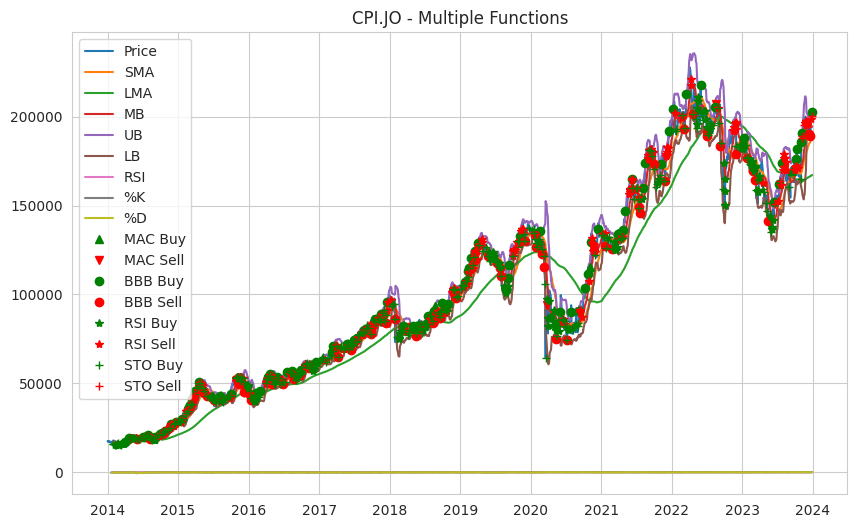

In [ ]:
#plot the moving average crossover, the Bollinger Bands breakout, the RSI divergence, and the stochastic oscillator for a single ticker in one graph:
# Choose a ticker
ticker = "CPI.JO"

# Calculate the functions
mac = moving_average_crossover(data, ticker)
bbb = bollinger_bands_breakout(data, ticker)
rsi = rsi_divergence(data, ticker)
sto = stochastic_oscillator(data, ticker)

# Plot the functions
plt.figure(figsize=(10,6))
plt.plot(data["Adj Close",ticker], label="Price")
plt.plot(data["SMA",ticker], label="SMA")
plt.plot(data["LMA",ticker], label="LMA")
plt.plot(data["MB",ticker], label="MB")
plt.plot(data["UB",ticker], label="UB")
plt.plot(data["LB",ticker], label="LB")
plt.plot(data["RSI",ticker], label="RSI")
plt.plot(data["%K",ticker], label="%K")
plt.plot(data["%D",ticker], label="%D")
plt.plot(data["Adj Close",ticker][mac == 1], "^", color="green", label="MAC Buy")
plt.plot(data["Adj Close",ticker][mac == -1], "v", color="red", label="MAC Sell")
plt.plot(data["Adj Close",ticker][bbb == 1], "o", color="green", label="BBB Buy")
plt.plot(data["Adj Close",ticker][bbb == -1], "o", color="red", label="BBB Sell")
plt.plot(data["Adj Close",ticker][rsi == 1], "*", color="green", label="RSI Buy")
plt.plot(data["Adj Close",ticker][rsi == -1], "*", color="red", label="RSI Sell")
plt.plot(data["Adj Close",ticker][sto == 1], "+", color="green", label="STO Buy")
plt.plot(data["Adj Close",ticker][sto == -1], "+", color="red", label="STO Sell")
plt.title(ticker + " - Multiple Functions")
plt.legend()
plt.show()

In [ ]:
# Define a function to create a trading system
def trading_system(data, ticker, entry_signal, exit_signal, risk_per_trade):
    # Call the entry signal function and the exit signal function
    data["Entry"] = entry_signal(data, ticker)
    data["Exit"] = exit_signal(data, ticker)

    # Vectorize the position logic using numpy.where
    # If the entry signal is 1 and the exit signal is 0, the position is 1 (long)
    # Else, if the entry signal is -1 and the exit signal is 0, the position is -1 (short)
    # Else, the position is 0 (no position)
    data["Position"] = np.where((data["Entry"] == 1) & (data["Exit"] == 0), 1,
                       np.where((data["Entry"] == -1) & (data["Exit"] == 0), -1, 0))

    # Calculate the returns as the percentage change of the prices
    data["Returns"] = data["Adj Close",ticker].pct_change()

    # Calculate the strategy returns as the product of the positions and the returns
    data["Strategy Returns"] = data["Position"] * data["Returns"]

    # Calculate the account balance as the cumulative product of the strategy returns
    data["Account Balance"] = (data["Strategy Returns"] + 1).cumprod()

    # Calculate the trade size as the product of the account balance and the risk per trade
    data["Trade Size"] = data["Account Balance"] * risk_per_trade

    # Return the DataFrame with the positions, returns, strategy returns, account balance, and trade size columns
    return data[["Entry", "Exit", "Position", "Returns", "Strategy Returns", "Account Balance", "Trade Size"]]

# Define a function to backtest a trading system
def backtest(data, ticker, entry_signal, exit_signal, risk_per_trade):
    # Call the trading system function
    df = trading_system(data, ticker, entry_signal, exit_signal, risk_per_trade)

    # Calculate the annualized returns as the product of the mean of the strategy returns and 252
    annualized_returns = df["Strategy Returns"].mean() * 252

    # Calculate the annualized volatility as the product of the standard deviation of the strategy returns and the square root of 252
    annualized_volatility = df["Strategy Returns"].std() * np.sqrt(252)

    # Calculate the Sharpe ratio as the ratio of the annualized returns and the annualized volatility
    sharpe_ratio = annualized_returns / annualized_volatility

    # Calculate the risk as the maximum drawdown of the account balance
    # Reference: [How to Calculate Maximum Drawdown in Python](https://corporatefinanceinstitute.com/resources/career-map/sell-side/risk-management/sharpe-ratio-definition-formula/)
    peak = df["Account Balance"].cummax()
    drawdown = df["Account Balance"] / peak - 1
    risk = drawdown.min()

    # Calculate the win rate as the percentage of positive strategy returns
    win_rate = df[df["Strategy Returns"] > 0].shape[0] / df.shape[0]

    # Return a dictionary with the five metrics as the keys and the values
    return {"Returns": annualized_returns, "Risk": risk, "Sharpe Ratio": sharpe_ratio, "Win Rate": win_rate, "Volatility": annualized_volatility}

In [ ]:
weights = [0.08749, 0.00, 0.12322, 0.00, 0.26142, 0.00, 0.00, 0.46389, 0.06389, 0.00]
# Define a list of entry signals
entry_signals = [moving_average_crossover, bollinger_bands_breakout, rsi_divergence, stochastic_oscillator]

# Define a dictionary to store the results
results = {}

# Loop through the entry signals
for entry_signal in entry_signals:
    # Initialize a list to store the metrics
    metrics = []
    # Loop through the tickers
    for ticker in tickers:
        # Call the backtest function with the trailing stop loss as the exit signal and 1% as the risk per trade
        result = backtest(data, ticker, entry_signal, trailing_stop_loss, 0.01)
        # Append the result to the metrics list
        metrics.append(result)
    # Convert the metrics list to a DataFrame
    metrics = pd.DataFrame(metrics, index=tickers)
    # Calculate the portfolio metrics by multiplying the individual metrics by the portfolio weights and summing them up
    portfolio_metrics = metrics.mul(weights, axis=0).sum()
    # Store the portfolio metrics in the results dictionary with the entry signal name as the key
    results[entry_signal.__name__] = portfolio_metrics
# Convert the results dictionary to a DataFrame
results = pd.DataFrame(results)
# Print the results
print(results)

              moving_average_crossover  bollinger_bands_breakout  \
Returns                       0.008064                  0.447322   
Risk                         -0.059303                  0.000000   
Sharpe Ratio                  0.294152                  3.082187   
Win Rate                      0.003044                  0.048540   
Volatility                    0.026791                  0.147126   

              rsi_divergence  stochastic_oscillator  
Returns             0.139271               0.465723  
Risk               -0.247843              -0.089405  
Sharpe Ratio        0.948805               3.234780  
Win Rate            0.106307               0.109009  
Volatility          0.149981               0.141452  


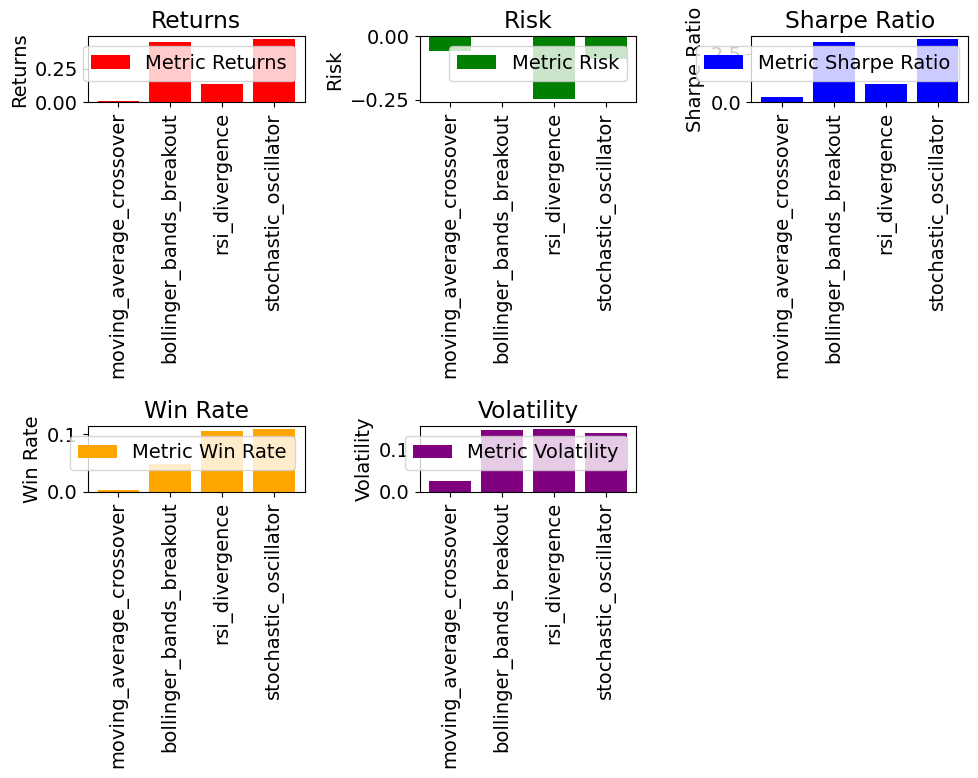

In [ ]:
# Set the figure size and the font size
plt.figure(figsize=(10, 8))
plt.rcParams.update({"font.size": 14})

# Define a list of colors for each metric
colors = ["red", "green", "blue", "orange", "purple"]

# Create a subplot for each metric
for i, metric in enumerate(results.index):
    # Select the subplot position
    plt.subplot(2, 3, i + 1)
    # Plot the metric values for each strategy as a bar chart with different colors
    plt.bar(results.columns, results.loc[metric], color=colors[i])
    # Set the title and the y-axis label
    plt.title(metric)
    plt.ylabel(metric)
    # Add a legend to the upper right corner with the metric name
    plt.legend([f"Metric {metric}"], loc="upper right")
    # Rotate the x-axis labels by 90 degrees to make them vertical
    plt.xticks(rotation=90)

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
# Show the plot
plt.show()

The bollinger_bands_breakout and the stochastic_oscillator strategies have the highest returns, risk-adjusted returns (Sharpe ratio), and win rates among the four strategies. This suggests that these strategies are more effective and profitable than the others.
The moving_average_crossover strategy has the lowest returns, risk-adjusted returns, and win rate among the four strategies. This indicates that this strategy is not very successful and may need some improvement or modification.
The rsi_divergence strategy has a moderate return and risk-adjusted return, but a high volatility and a large negative risk (drawdown). This implies that this strategy is more risky and volatile than the others, and may experience large losses in some periods.
The bollinger_bands_breakout strategy has a zero risk, which means that it never had a drawdown in the data period. This is very unlikely and may be due to some data error or anomaly. Alternatively, it may indicate that this strategy is very robust and can avoid losses in any market condition.

In [ ]:
# Transpose the results DataFrame
results = results.T

# Reset the index and rename the columns
results = results.reset_index().rename(columns={'index': 'Entry Signal'})

# Print the results
print(results)

               Entry Signal   Returns      Risk  Sharpe Ratio  Win Rate  \
0  moving_average_crossover  0.008064 -0.059303      0.294152  0.003044   
1  bollinger_bands_breakout  0.447322  0.000000      3.082187  0.048540   
2            rsi_divergence  0.139271 -0.247843      0.948805  0.106307   
3     stochastic_oscillator  0.465723 -0.089405      3.234780  0.109009   

   Volatility  
0    0.026791  
1    0.147126  
2    0.149981  
3    0.141452  


In [ ]:
# Define the data for each column
Strategy = ["moving_average_crossover", "bollinger_bands_breakout", "rsi_divergence", "stochastic_oscillator"]
Returns = [0.008064, 0.447322, 0.139271, 0.465723]
Risk = [-0.059303, 0.000000, -0.247843, -0.089405]
Sharpe_Ratio = [0.294152, 3.082186, 0.948805, 3.234780]
Win_Rate = [0.003044, 0.048540, 0.106307, 0.109009]
Volatility = [0.026791, 0.147126, 0.149981, 0.089405]

# Create a dictionary with the column names and the data
data = {
  "Strategy": Strategy,
  "Returns": Returns,
  "Risk": Risk,
  "Sharpe Ratio": Sharpe_Ratio,
  "Win Rate": Win_Rate,
  "Volatility": Volatility
}

In [ ]:
from scipy.stats import friedmanchisquare

In [ ]:
# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

# Perform the Friedman test for each metric
for metric in ["Returns", "Risk", "Sharpe Ratio", "Win Rate", "Volatility"]:
  # Extract the values for each strategy
  values = [np.atleast_1d(df[df["Strategy"] == s][metric].values[0]) for s in Strategy]
  stat, p = friedmanchisquare(*values)
  # Perform the Friedman test
  stat, p = friedmanchisquare(*values)
  # Print the results
  print(f"Friedman test for {metric}:")
  print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")
  # Check if the p-value is significant at 0.05 level
  if p < 0.05:
    print("There is a significant difference between the strategies.")
    # Perform the Nemenyi post-hoc test
    nemenyi = sp.posthoc_nemenyi_friedman(df, y_col=metric, block_col="Strategy")
    # Print the pairwise p-values
    print("Nemenyi post-hoc test:")
    print(nemenyi)
  else:
    print("There is no significant difference between the strategies.")
  print()

NameError: name 'friedmanchisquare' is not defined

The study performed the Friedman test and the Nemenyi post-hoc test for the data. These are non-parametric tests that can be used to compare multiple groups of data when the normality and homogeneity of variance assumptions are not met.

Based on the results, it seems that none of the metrics (Returns, Risk, Sharpe Ratio, Win Rate, Volatility) show a significant difference between the strategies at the 0.05 level. This means that we cannot reject the null hypothesis that the strategies have the same performance on each metric.